In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [3]:
train = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\wine\train(6).csv')
test = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\wine\test(6).csv')

In [4]:
#y = train['quality']
df = pd.concat([train,test], axis = 0, ignore_index=True)

In [5]:
train.shape, test.shape, df.shape

((5497, 14), (1000, 13), (6497, 14))

In [6]:
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5.0,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5.0,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5.0,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6.0,7.0,0.210,0.31,6.00,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6.0,7.8,0.400,0.26,9.50,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,NaN,7.1,0.590,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
6493,996,NaN,8.7,0.150,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
6494,997,NaN,8.8,0.660,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
6495,998,NaN,7.0,0.420,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [7]:
df.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

index : 구분자
quality : 품질
fixed acidity : 산도
volatile acidity : 휘발성산
citric acid : 시트르산
residual sugar : 잔당: 발효 후 와인 속에 남아있는 당분
chlorides : 염화물
free sulfur dioxide : 독립 이산화황
total sulfur dioxide : 총 이산화황
density : 밀도
pH : 수소이온농도
sulphates : 황산염
alcohol : 도수
type : 종류

# 데이터프레임 정보 확인

In [8]:
df.dtypes

# 데이터 타입 확인 수치형 변수가 많은 것을 확인했습니다.

index                     int64
quality                 float64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                     object
dtype: object

In [9]:
df['quality'] = df['quality'].astype('category')

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

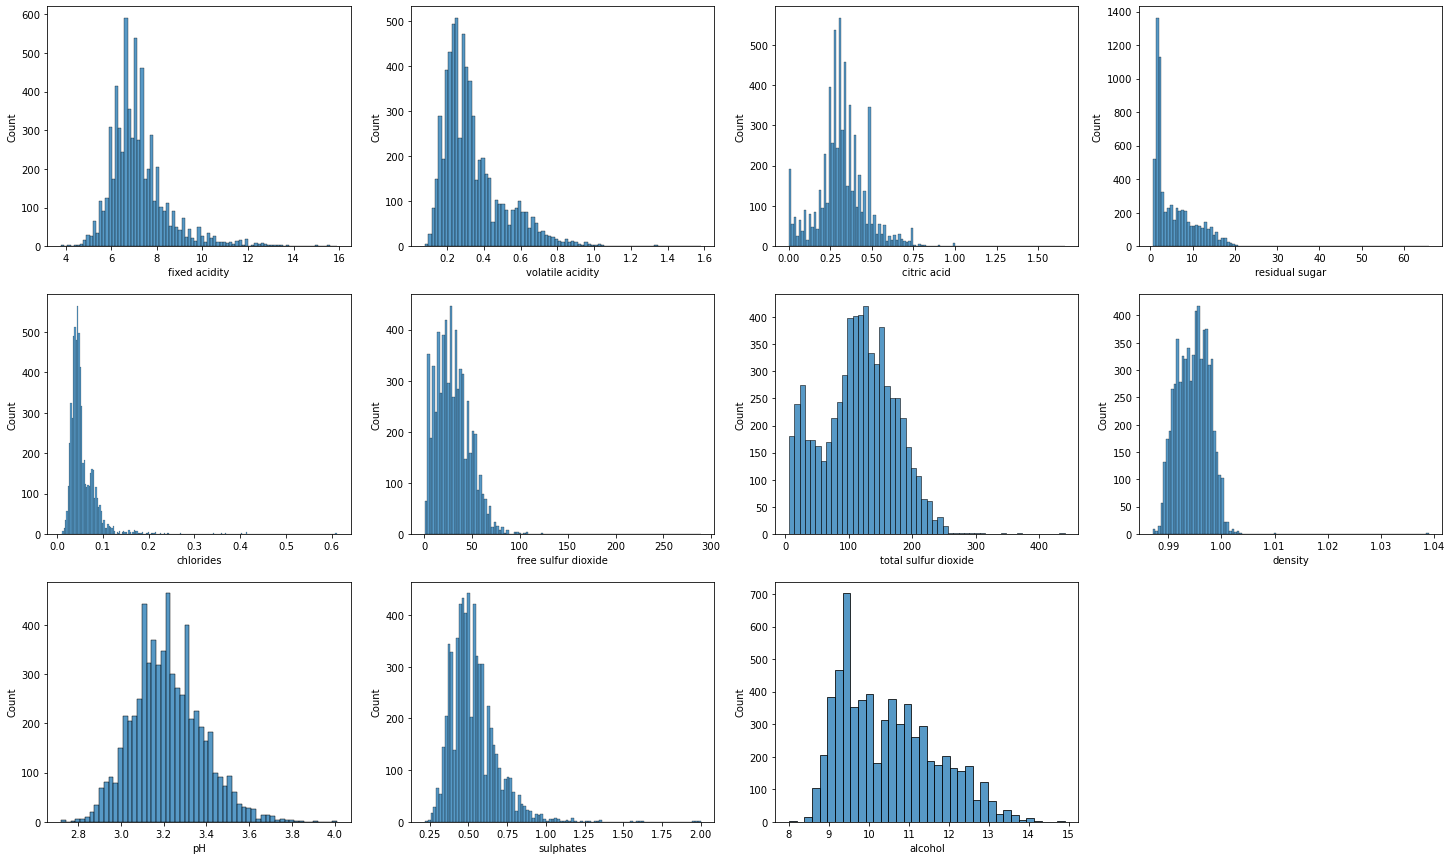

In [10]:
fig = plt.figure(figsize=(25, 15))
plt.subplot(3, 4, 1)
sns.histplot(data=df, x='fixed acidity')
plt.subplot(3, 4, 2)
sns.histplot(data=df, x='volatile acidity')
plt.subplot(3, 4, 3)
sns.histplot(data=df, x='citric acid')
plt.subplot(3, 4, 4)
sns.histplot(data=df, x='residual sugar')
plt.subplot(3, 4, 5)
sns.histplot(data=df, x='chlorides')
plt.subplot(3, 4, 6)
sns.histplot(data=df, x='free sulfur dioxide')
plt.subplot(3, 4, 7)
sns.histplot(data=df, x='total sulfur dioxide')
plt.subplot(3, 4, 8)
sns.histplot(data=df, x='density')
plt.subplot(3, 4, 9)
sns.histplot(data=df, x='pH')
plt.subplot(3, 4, 10)
sns.histplot(data=df, x='sulphates')
plt.subplot(3, 4, 11)
sns.histplot(data=df, x='alcohol')

**확인결과**

모델 학습전에 스케일링이나 이상치 처리 필요


<AxesSubplot:>

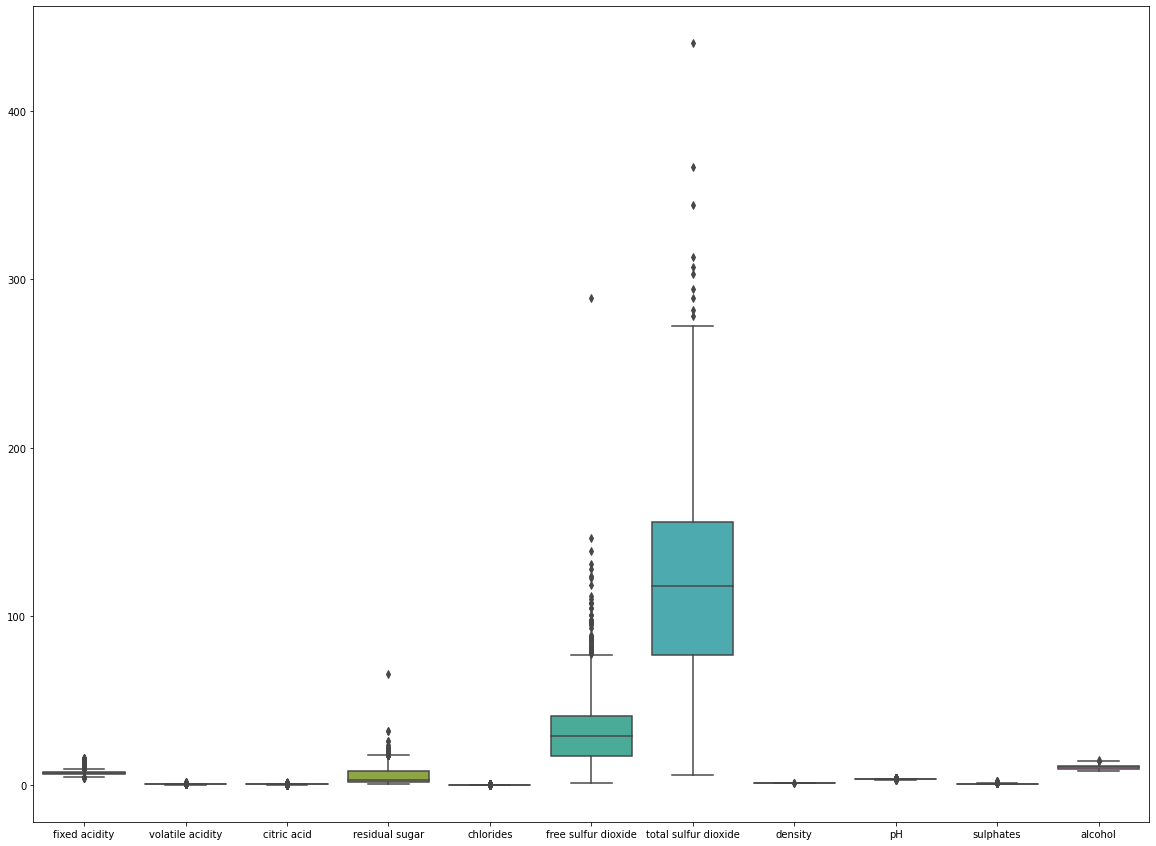

In [11]:
fig = plt.figure(figsize=(20, 15))
sns.boxplot(data=df[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

C:\Users\yoon9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

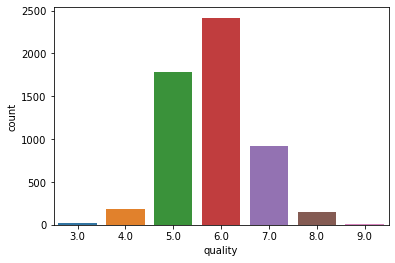

In [12]:
sns.countplot(df['quality'])

# 결측치 확인

In [13]:
df.isnull().sum()

# 결측치는 없다

index                      0
quality                 1000
fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
type                       0
dtype: int64

# 상관관계 분석

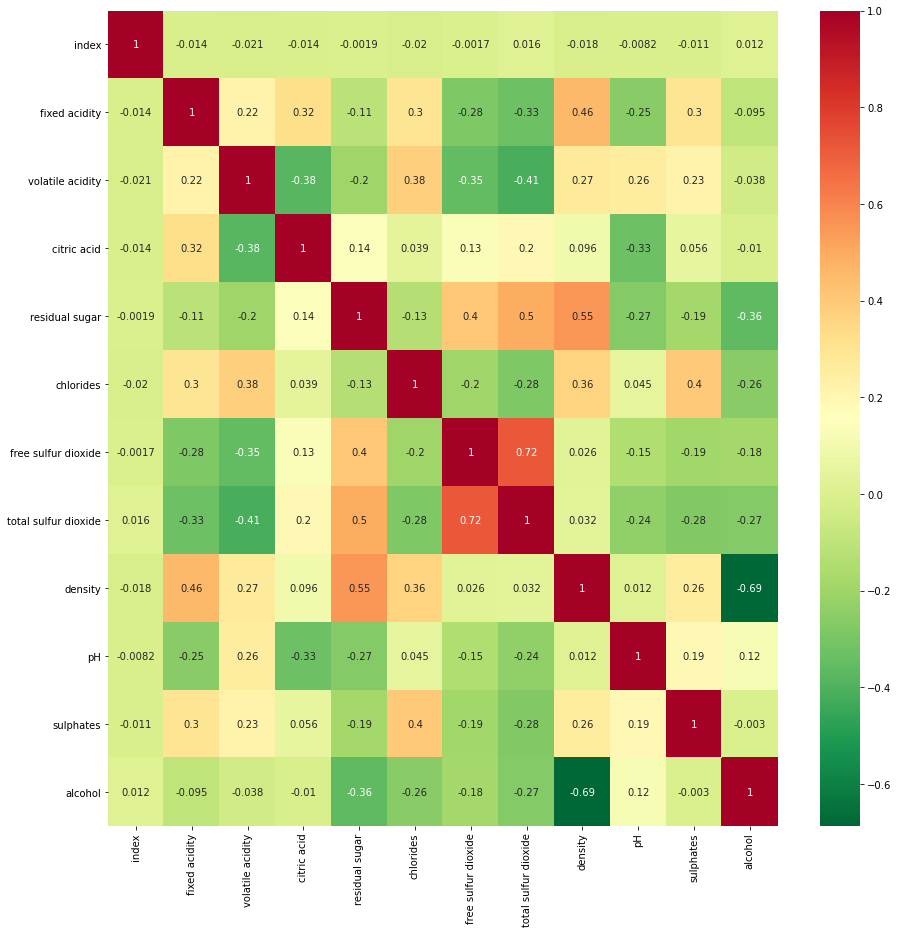

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn_r')
plt.show()

상관관계를 확인해본 결과 예상대로 높은 상관관계를 보이는 free sulfur dioxide, total sulfur dioxide 중 데이터의 분포가 넓은 total sulfur dioxide 만 살리겠습니다.

In [15]:
df = df.drop(columns=['free sulfur dioxide'])

# 이상치 제거

In [16]:
df.sort_values('residual sugar',ascending=False)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
1220,1220,6.0,7.8,0.965,0.60,65.80,0.074,160.0,1.03898,3.39,0.69,11.7,white
4189,4189,6.0,7.9,0.330,0.28,31.60,0.053,176.0,1.01030,3.15,0.38,8.8,white
4068,4068,6.0,7.9,0.330,0.28,31.60,0.053,176.0,1.01030,3.15,0.38,8.8,white
2440,2440,6.0,6.8,0.450,0.28,26.05,0.031,122.0,1.00295,3.06,0.42,10.6,white
3033,3033,6.0,6.8,0.450,0.28,26.05,0.031,122.0,1.00295,3.06,0.42,10.6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1558,5.0,5.9,0.170,0.28,0.70,0.027,28.0,0.98985,3.13,0.32,10.6,white
429,429,5.0,5.2,0.170,0.27,0.70,0.030,68.0,0.99218,3.30,0.41,9.8,white
3073,3073,5.0,5.3,0.210,0.29,0.70,0.028,66.0,0.99215,3.30,0.40,9.8,white
4477,4477,5.0,8.7,0.240,0.35,0.60,0.042,71.0,0.99260,3.08,0.38,10.6,white


In [17]:
df[df['residual sugar'] > 60]

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
1220,1220,6.0,7.8,0.965,0.6,65.8,0.074,160.0,1.03898,3.39,0.69,11.7,white


In [18]:
df = df[df['residual sugar'] < 60]

# residual sugar 가 60 이상인 값을 제거해주었습니다.

In [19]:
df.sort_values('total sulfur dioxide',ascending=False)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
5402,5402,3.0,6.1,0.260,0.25,2.90,0.047,440.0,0.99314,3.44,0.64,10.5,white
2741,2741,3.0,8.6,0.550,0.35,15.55,0.057,366.5,1.00010,3.04,0.63,11.0,white
2307,2307,5.0,9.1,0.330,0.38,1.70,0.062,344.0,0.99580,3.10,0.70,9.5,white
793,793,5.0,7.5,0.270,0.31,5.80,0.057,313.0,0.99460,3.18,0.59,10.5,white
747,747,3.0,7.1,0.490,0.22,2.00,0.047,307.5,0.99240,3.24,0.37,11.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,195,NaN,8.0,0.580,0.16,2.00,0.120,7.0,0.99454,3.22,0.58,11.2,red
5986,489,NaN,8.0,0.600,0.08,2.60,0.056,7.0,0.99286,3.22,0.37,13.0,red
1925,1925,6.0,8.6,0.315,0.40,2.20,0.079,6.0,0.99512,3.27,0.67,11.9,red
3043,3043,5.0,12.2,0.450,0.49,1.40,0.075,6.0,0.99690,3.13,0.63,10.4,red


In [20]:
df[((df['total sulfur dioxide'] > 300) & (df['total sulfur dioxide'] < 400))]

# total sulfur dioxide 가 60 이상인 값을 제거해주었습니다.

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
747,747,3.0,7.1,0.49,0.22,2.00,0.047,307.5,0.99240,3.24,0.37,11.0,white
793,793,5.0,7.5,0.27,0.31,5.80,0.057,313.0,0.99460,3.18,0.59,10.5,white
2307,2307,5.0,9.1,0.33,0.38,1.70,0.062,344.0,0.99580,3.10,0.70,9.5,white
2741,2741,3.0,8.6,0.55,0.35,15.55,0.057,366.5,1.00010,3.04,0.63,11.0,white
2848,2848,5.0,6.9,0.40,0.22,5.95,0.081,303.0,0.99705,3.40,0.57,9.4,white


In [21]:
df = df[~((df['total sulfur dioxide'] > 300) & (df['total sulfur dioxide'] < 400))]

In [22]:
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5.0,5.6,0.695,0.06,6.80,0.042,84.0,0.99432,3.44,0.44,10.2,white
1,1,5.0,8.8,0.610,0.14,2.40,0.067,42.0,0.99690,3.19,0.59,9.5,red
2,2,5.0,7.9,0.210,0.39,2.00,0.057,138.0,0.99176,3.05,0.52,10.9,white
3,3,6.0,7.0,0.210,0.31,6.00,0.046,108.0,0.99390,3.26,0.50,10.8,white
4,4,6.0,7.8,0.400,0.26,9.50,0.059,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,995,NaN,7.1,0.590,0.02,2.30,0.082,94.0,0.99744,3.55,0.53,9.7,red
6493,996,NaN,8.7,0.150,0.30,1.60,0.046,130.0,0.99420,3.22,0.38,9.8,white
6494,997,NaN,8.8,0.660,0.26,1.70,0.074,23.0,0.99710,3.15,0.74,9.2,red
6495,998,NaN,7.0,0.420,0.19,2.30,0.071,36.0,0.99476,3.39,0.56,10.9,red


<AxesSubplot:>

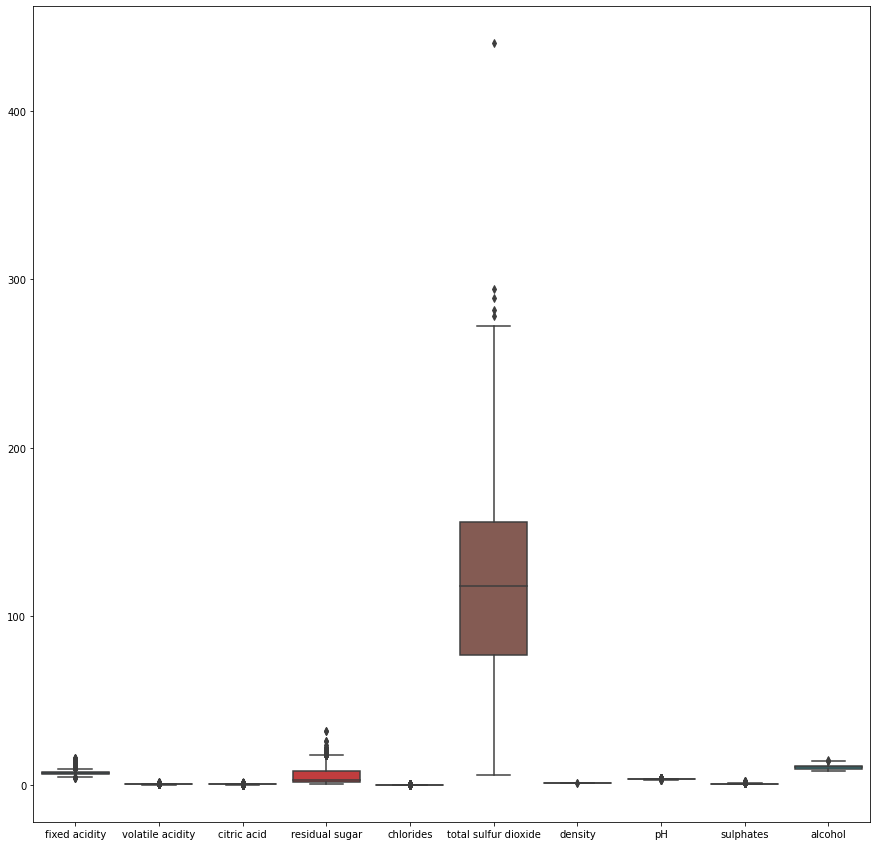

In [23]:
fig = plt.figure(figsize=(15, 15))
sns.boxplot(data=df[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

데이터 중에서 train 데이터의 이상치는 제거를 했지만 test 데이터는 submission 을 제출하기 위해서 제거하지 않았습니다.

# 피처 엔지니어링

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

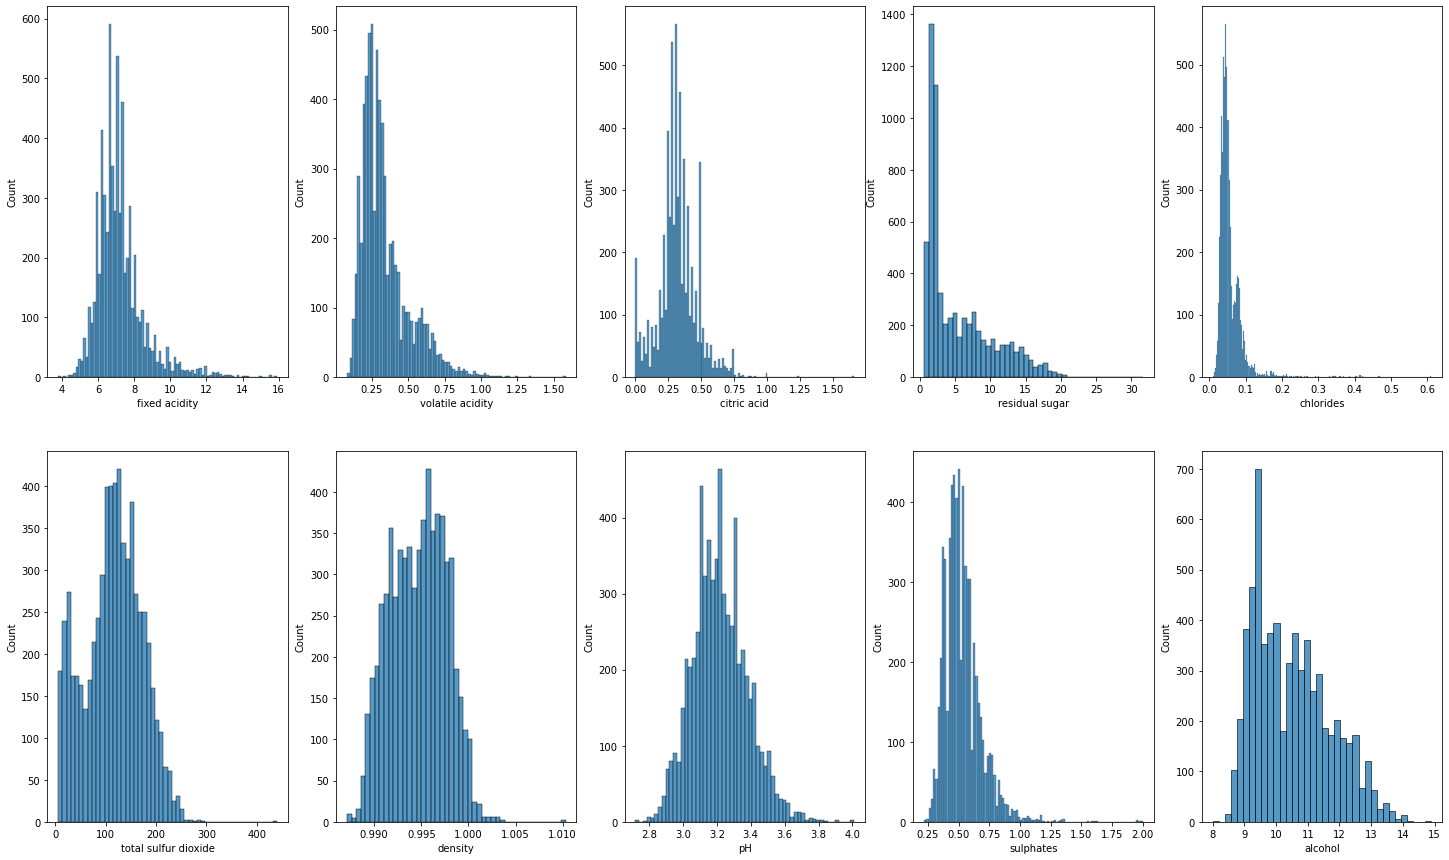

In [24]:
fig = plt.figure(figsize=(25, 15))
plt.subplot(2, 5, 1)
sns.histplot(data=df, x='fixed acidity')
plt.subplot(2, 5, 2)
sns.histplot(data=df, x='volatile acidity')
plt.subplot(2, 5, 3)
sns.histplot(data=df, x='citric acid')
plt.subplot(2, 5, 4)
sns.histplot(data=df, x='residual sugar')
plt.subplot(2, 5, 5)
sns.histplot(data=df, x='chlorides')
plt.subplot(2, 5, 6)
sns.histplot(data=df, x='total sulfur dioxide')
plt.subplot(2, 5, 7)
sns.histplot(data=df, x='density')
plt.subplot(2, 5, 8)
sns.histplot(data=df, x='pH')
plt.subplot(2, 5, 9)
sns.histplot(data=df, x='sulphates')
plt.subplot(2, 5, 10)
sns.histplot(data=df, x='alcohol')

## StandardScaler 스케일링

위의 분포중에서 가우시안 분포의 형태를 띄는 데이터는 StandardScaler 아니면 MinMaxScaler 를 사용해주었습니다.

In [25]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [26]:
y = df['quality']
stand_attribs = df[['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','volatile acidity','residual sugar']]
#Minmax_attribs = df[['volatile acidity','residual sugar']]
cat_1hot_attribs = df[['type']]

In [27]:
# StandardScaler
S_scaler = StandardScaler()
S_X_scaler  = S_scaler.fit(stand_attribs)
S_X_scale = S_X_scaler.transform(stand_attribs)
S_X_scale = pd.DataFrame(S_X_scale, columns=stand_attribs.columns)
S_X_scale  # 스케일링 데이터 프레임화

,fixed acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,volatile acidity,residual sugar
0,-1.245384,-1.779584,-0.400272,-0.561513,-0.125109,1.377551,-0.612928,-0.244595,2.161234,0.290888
1,1.222654,-1.229071,0.313102,-1.308414,0.750074,-0.177211,0.395040,-0.831399,1.644458,-0.645643
2,0.528518,0.491283,0.027752,0.398789,-0.993507,-1.047877,-0.075345,0.342209,-0.787426,-0.730782
3,-0.165618,-0.059230,-0.286132,-0.134712,-0.267580,0.258123,-0.209741,0.258380,-0.787426,0.120609
4,0.451392,-0.403301,0.084822,1.110123,0.275169,-1.110068,-0.680126,0.342209,0.367719,0.865576
...,...,...,...,...,...,...,...,...,...,...
6486,-0.088491,-2.054840,0.741126,-0.383679,0.933252,2.061646,-0.008147,-0.663740,1.522864,-0.666927
6487,1.145528,-0.128045,-0.286132,0.256522,-0.165815,0.009361,-1.016115,-0.579911,-1.152209,-0.815921
6488,1.222654,-0.403301,0.512846,-1.646298,0.817918,-0.425973,1.403007,-1.082886,1.948444,-0.794636
6489,-0.165618,-0.885000,0.427242,-1.415114,0.024147,1.066599,0.193446,0.342209,0.489313,-0.666927


In [28]:
# # 수치형 변수 스케일링
# M_scaler = MinMaxScaler()
# M_X_scaler  = M_scaler.fit(Minmax_attribs)
# M_X_scale = M_X_scaler.transform(Minmax_attribs)
# M_X_scale = pd.DataFrame(M_X_scale, columns=Minmax_attribs.columns)
# M_X_scale  # 스케일링 데이터 프레임화

# One-Hot-Encoding

In [29]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False)
X_1hot = hot1_encoder.fit_transform(cat_1hot_attribs)
X_1hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [30]:
X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names())  #순서가 없는 카테고리형
# 데이터 프레임화
X_1hot

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
6486,1.0,0.0
6487,0.0,1.0
6488,1.0,0.0
6489,1.0,0.0


# 데이터 합치기

In [31]:
df_precessed = pd.concat([S_X_scale, X_1hot], axis = 1)
df_precessed

,fixed acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,volatile acidity,residual sugar,x0_red,x0_white
0,-1.245384,-1.779584,-0.400272,-0.561513,-0.125109,1.377551,-0.612928,-0.244595,2.161234,0.290888,0.0,1.0
1,1.222654,-1.229071,0.313102,-1.308414,0.750074,-0.177211,0.395040,-0.831399,1.644458,-0.645643,1.0,0.0
2,0.528518,0.491283,0.027752,0.398789,-0.993507,-1.047877,-0.075345,0.342209,-0.787426,-0.730782,0.0,1.0
3,-0.165618,-0.059230,-0.286132,-0.134712,-0.267580,0.258123,-0.209741,0.258380,-0.787426,0.120609,0.0,1.0
4,0.451392,-0.403301,0.084822,1.110123,0.275169,-1.110068,-0.680126,0.342209,0.367719,0.865576,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6486,-0.088491,-2.054840,0.741126,-0.383679,0.933252,2.061646,-0.008147,-0.663740,1.522864,-0.666927,1.0,0.0
6487,1.145528,-0.128045,-0.286132,0.256522,-0.165815,0.009361,-1.016115,-0.579911,-1.152209,-0.815921,0.0,1.0
6488,1.222654,-0.403301,0.512846,-1.646298,0.817918,-0.425973,1.403007,-1.082886,1.948444,-0.794636,1.0,0.0
6489,-0.165618,-0.885000,0.427242,-1.415114,0.024147,1.066599,0.193446,0.342209,0.489313,-0.666927,1.0,0.0


# train, val split

In [32]:
X = df_precessed[:5491]
test = df_precessed[5491:]
y = y[:5491]
# train, test 나누기
X.shape, test.shape, y.shape

((5491, 12), (1000, 12), (5491,))

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2,shuffle=True, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4392, 12), (1099, 12), (4392,), (1099,))

# 베이스라인 모델 학습

In [34]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [35]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')

In [36]:
base_model = RandomForestClassifier(max_depth=10, min_samples_leaf=10)
base_model.fit(X_train, y_train)  # 모델 학습

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

In [37]:
model_eval(base_model.predict(X_train),y_train)

accuracy_score : 0.6989981785063752


In [38]:
model_eval(base_model.predict(X_val),y_val)

accuracy_score : 0.5805277525022748


**오버 피팅이 발생한 것을 확인할 수 있다.**

# 모델 튜닝

In [43]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV 를 통해 파라미터 튜닝을 진행
tuned_parameters = {
    'n_estimators' : [300],
    'max_depth': range(9,15,1),
    'min_samples_leaf': range(2,15,1),
}

model_grid = GridSearchCV(RandomForestClassifier(random_state=42,n_jobs=-1), tuned_parameters, cv=3, scoring="accuracy", verbose=2, refit=True)
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 78 candidates, totalling 234 fits
[CV] max_depth=9, min_samples_leaf=2, n_estimators=300 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=9, min_samples_leaf=2, n_estimators=300, total=   4.6s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=300 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  max_depth=9, min_samples_leaf=2, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=3, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=3, n_estimators=300, total=   0.5s
[CV] max_depth=9, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=4, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=4, n_estimators=300 ...............
[CV]  max_depth=9, min_samples_leaf=4, n_estimators=300, total=   0.4s
[CV] max_depth=9, min_samples_leaf=4, n_estimators=300 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 234 out of 234 | elapsed:  2.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': range(9, 15),
                         'min_samples_leaf': range(2, 15),
                         'n_estimators': [300]},
             scoring='accuracy', verbose=2)

In [44]:
model_grid.best_params_

{'max_depth': 14, 'min_samples_leaf': 2, 'n_estimators': 300}

In [45]:
model_eval(model_grid.predict(X_train),y_train)

accuracy_score : 0.9378415300546448


In [46]:
model_eval(model_grid.predict(X_val),y_val)

accuracy_score : 0.6396724294813467


**오버피팅이 발생하였지만 가장 좋은 성능을 보임**

# Shap 를 활용한 결과 해석

In [40]:
model_shap = RandomForestClassifier(max_depth = 14, min_samples_leaf= 2, n_estimators = 1000)
model_shap.fit(X_train, y_train)
## 최적의 파라미터로 랜덤포레스트 생성

RandomForestClassifier(max_depth=14, min_samples_leaf=2, n_estimators=1000)

In [41]:
model_eval(model_shap.predict(X_val),y_val)

accuracy_score : 0.6478616924476797


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_shap) # shap 라이브러리

In [ ]:
X_val.loc[[709]] # 설명할 데이터 예시

In [ ]:
choosen_instance = X_val.loc[[709]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

해석 : 위에 보이는 것은 기능에 대한 shapley 값을 시각화하는 힘 플롯입니다. 분홍색으로 표시된 기능 값은 예측을 증가시킵니다.
막대의 크기는 기능 효과의 크기를 나타냅니다.
파란색의 기능 값은 예측을 감소시킵니다.
모든 기능 SHAP 값의 합계는 모델 예측이 기준선과 다른 이유를 설명합니다.

In [ ]:
shap.summary_plot(shap_values, X_train)

y축은 각 특성을, x축은 Shapely value를 나타내고 있습니다. 색깔은 특성값을 나타내어 빨간색으로 갈수록 높은 값을 의미합니다.
그래프 상에서 특성은 예측에 미치는 영향력(=중요도)에 따라 정렬됩니다. 즉 LSTAT가 결과값 예측에 가장 큰 영향을 끼치는 것입니다.
위 그래프를 보면, LSTAT 특성값이 작을수록(파란색) 예측에 긍정적인 영향을, 클수록(빨간색) 부정적인 영향을 미치고 있습니다.

# submission

In [ ]:
test_predicted = model_shap.predict(test)
test_predicted

In [ ]:
submission = pd.read_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\wine\submission(6).csv')
submission

In [ ]:
submission['quality'] = test_predicted

In [ ]:
submission

In [ ]:
#submission.to_csv(r'C:\Users\yoon9\PycharmProjects\Sejong_Project\AI Class\Data\wine\submission_17011733_윤지환.csv',index = False)